# Your company is Rossmann.
### Business issue : predict the stores turnover

Authors: BOIVIN Jolyanne, BOUCHER Axel, DE BROGLIE Aymon, GRIGNARD Jeremy, KARTHIGESU Dinojan, NAULET Antoine

### Table of contents

* Preprocessing
* Feature Engineering
* Validation strategy
* Training and evaluation

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
import matplotlib.pyplot as plt

# For split
from sklearn.model_selection import train_test_split
%matplotlib inline

# Data Loading

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
store = pd.read_csv('data/store.csv')

/home/ro/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [5]:
distinctIdStoreTest = test.Id.unique()
distinctIdStoreTest

array([    1,     2,     3, ..., 41086, 41087, 41088])

In [6]:
test[test.Store == 3].sort_values(by='Date', ascending=True)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
40233,40234,3,6,2015-08-01,1.0,0,0,0
39377,39378,3,7,2015-08-02,0.0,0,0,0
38521,38522,3,1,2015-08-03,1.0,1,0,1
37665,37666,3,2,2015-08-04,1.0,1,0,1
36809,36810,3,3,2015-08-05,1.0,1,0,1
35953,35954,3,4,2015-08-06,1.0,1,0,1
35097,35098,3,5,2015-08-07,1.0,1,0,1
34241,34242,3,6,2015-08-08,1.0,0,0,0
33385,33386,3,7,2015-08-09,0.0,0,0,0
32529,32530,3,1,2015-08-10,1.0,0,0,1


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# First Look 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [10]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
print('Here we can see that there are missing values for several features in store:', store.isnull().sum().sum())

Here we can see that there are missing values for several features in store: 2343


# Preprocessing

# Preprocessing on Train and Test

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


#### According to the documentation

* DateTime for Date
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None


### Change the date to hundle datetime object

In [14]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

### We first replace the '0' values present in the train and test set by 0 (int) Next we use get dummies for each present value

In [15]:
print("Train before", train['StateHoliday'].unique())
train.replace({"StateHoliday": {"0": 0}}, inplace=True)
print("Train Before", train['StateHoliday'].unique())

Train before ['0' 'a' 'b' 'c' 0]
Train Before [0 'a' 'b' 'c']


In [16]:
print("Test After", test['StateHoliday'].unique())
test.replace({"StateHoliday": {"0": 0}}, inplace=True)
print("Test After", test['StateHoliday'].unique())

Test After ['0' 'a']
Test After [0 'a']


In [17]:
train[['StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c']] = pd.get_dummies(train['StateHoliday'])
test[['StateHoliday_0', 'StateHoliday_a']] = pd.get_dummies(test['StateHoliday'])
train.drop('StateHoliday', axis=1, inplace=True)
test.drop('StateHoliday', axis=1, inplace=True)

### Here we check the DayOfWeek for each Nan Values for the feature Open
#### As we can see, there is no Sunday. Therefore we replace the NaN values by 1 (the store is open), To be more realistic we should map the day with a American calendar to see if each day is a sunday, special day, close day, holiday, public bank holiday

In [18]:
test[test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
479,480,622,4,2015-09-17,NaN,1,0,1,0
1335,1336,622,3,2015-09-16,NaN,1,0,1,0
2191,2192,622,2,2015-09-15,NaN,1,0,1,0
3047,3048,622,1,2015-09-14,NaN,1,0,1,0
4759,4760,622,6,2015-09-12,NaN,0,0,1,0
5615,5616,622,5,2015-09-11,NaN,0,0,1,0
6471,6472,622,4,2015-09-10,NaN,0,0,1,0
7327,7328,622,3,2015-09-09,NaN,0,0,1,0
8183,8184,622,2,2015-09-08,NaN,0,0,1,0
9039,9040,622,1,2015-09-07,NaN,0,0,1,0


In [19]:
test.replace({"Open": {np.nan: 1}}, inplace=True)

In [20]:
test[test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a


# Preprocessing on Store

In [21]:
objectFeaturesStore = ['StoreType', 'Assortment', 'PromoInterval']

In [22]:
store[objectFeaturesStore].head()

,StoreType,Assortment,PromoInterval
0,c,a,NaN
1,a,a,"Jan,Apr,Jul,Oct"
2,a,a,"Jan,Apr,Jul,Oct"
3,c,c,NaN
4,a,a,NaN


# According to the documentation

* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


#### Replace missing values by mean 

In [23]:
# Features to preprecess numerically
# 3 features are object type
featuresToPreprocessByMean = ['Store', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear']

In [24]:
for idx in featuresToPreprocessByMean:
    store[idx] = store[idx].fillna(np.mean(store[idx]))

In [25]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1115 non-null float64
CompetitionOpenSinceMonth    1115 non-null float64
CompetitionOpenSinceYear     1115 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              1115 non-null float64
Promo2SinceYear              1115 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### StoreType, Assortment, PromoInterval

In [26]:
print('distinct_storeType:', store['StoreType'].unique(), '\ndistinct_assortment: ', store['Assortment'].unique(), '\ndistinct_promoInterval: ', store['PromoInterval'].unique())

distinct_storeType: ['c' 'a' 'd' 'b'] 
distinct_assortment:  ['a' 'c' 'b'] 
distinct_promoInterval:  [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [27]:
store[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']] = pd.get_dummies(store['StoreType'])
store[['Assortment_a', 'Assortment_b', 'Assortment_c']] = pd.get_dummies(store['Assortment'])
store.drop('StoreType', axis=1, inplace=True)
store.drop('Assortment', axis=1, inplace=True)

In [28]:
store.replace({"PromoInterval": {np.nan: 0}}, inplace=True)

In [29]:
store.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,1270.0,9.0,2008.0,0,23.595447,2011.763573,0,0,0,1,0,1,0,0
1,2,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
2,3,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct",1,0,0,0,1,0,0
3,4,620.0,9.0,2009.0,0,23.595447,2011.763573,0,0,0,1,0,0,0,1
4,5,29910.0,4.0,2015.0,0,23.595447,2011.763573,0,1,0,0,0,1,0,0


In [30]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 15 columns):
Store                        1115 non-null int64
CompetitionDistance          1115 non-null float64
CompetitionOpenSinceMonth    1115 non-null float64
CompetitionOpenSinceYear     1115 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              1115 non-null float64
Promo2SinceYear              1115 non-null float64
PromoInterval                1115 non-null object
StoreType_a                  1115 non-null uint8
StoreType_b                  1115 non-null uint8
StoreType_c                  1115 non-null uint8
StoreType_d                  1115 non-null uint8
Assortment_a                 1115 non-null uint8
Assortment_b                 1115 non-null uint8
Assortment_c                 1115 non-null uint8
dtypes: float64(5), int64(2), object(1), uint8(7)
memory usage: 77.4+ KB


In [31]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
promoMonths = ['PromoJan', 'PromoFeb', 'PromoMar', 'PromoApr', 'PromoMay', 'PromoJun', 'PromoJul', 
               'PromoAug', 'PromoSept', 'PromoOct', 'PromoNov', 'PromoDec']

# Ajout des colonnes pour tous les moisPromo
# On mettra 1 qd promo, 0 sinon
for v in promoMonths:
    store[v] = 0
    
for idx, val in enumerate(store['PromoInterval']):
    if val != 0:
        mons = val.split(',')
        for mon in mons:
            columnName = 'Promo' + mon
            store.loc[idx, columnName] = 1


In [32]:
##On rajoute une colonne pour avoir la data du début de la competition ainsi qu'une date du début de promo 2
def date_init_compet (col1, col2):
    if col1 != 0:
        return pd.to_datetime(str('01/')+str((int(col1)))+"/"+str(int(col2)))
    
def date_init_promo(week,year):
    if week != 0: 
        return pd.to_datetime(str(int(week)) + '/' + str(int(year)) + '/' + '0', format='%W/%Y/%w')
    
store['BeginCompetition'] = store.apply(lambda x : date_init_compet(x['CompetitionOpenSinceMonth'], x['CompetitionOpenSinceYear']),axis=1) 
store['BeginPromo2'] = store.apply(lambda x : date_init_promo(x['Promo2SinceWeek'], x['Promo2SinceYear']),axis=1) 

    
store.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,...,PromoMay,PromoJun,PromoJul,PromoAug,PromoSept,PromoOct,PromoNov,PromoDec,BeginCompetition,BeginPromo2
0,1,1270.0,9.0,2008.0,0,23.595447,2011.763573,0,0,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
1,2,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct",1,0,...,0,0,1,0,0,1,0,0,2007-01-11,2010-04-04
2,3,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct",1,0,...,0,0,1,0,0,1,0,0,2006-01-12,2011-04-10
3,4,620.0,9.0,2009.0,0,23.595447,2011.763573,0,0,0,...,0,0,0,0,0,0,0,0,2009-01-09,2011-06-12
4,5,29910.0,4.0,2015.0,0,23.595447,2011.763573,0,1,0,...,0,0,0,0,0,0,0,0,2015-01-04,2011-06-12


In [33]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 29 columns):
Store                        1115 non-null int64
CompetitionDistance          1115 non-null float64
CompetitionOpenSinceMonth    1115 non-null float64
CompetitionOpenSinceYear     1115 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              1115 non-null float64
Promo2SinceYear              1115 non-null float64
PromoInterval                1115 non-null object
StoreType_a                  1115 non-null uint8
StoreType_b                  1115 non-null uint8
StoreType_c                  1115 non-null uint8
StoreType_d                  1115 non-null uint8
Assortment_a                 1115 non-null uint8
Assortment_b                 1115 non-null uint8
Assortment_c                 1115 non-null uint8
PromoJan                     1115 non-null int64
PromoFeb                     1115 non-null int64
PromoMar                     1115 non-null int64


#### Merge Train and Store

In [34]:
train.columns, store.columns

(Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
        'StateHoliday_c'],
       dtype='object'),
 Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
        'Promo2SinceYear', 'PromoInterval', 'StoreType_a', 'StoreType_b',
        'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
        'Assortment_c', 'PromoJan', 'PromoFeb', 'PromoMar', 'PromoApr',
        'PromoMay', 'PromoJun', 'PromoJul', 'PromoAug', 'PromoSept', 'PromoOct',
        'PromoNov', 'PromoDec', 'BeginCompetition', 'BeginPromo2'],
       dtype='object'))

In [35]:
df = pd.merge(train, store, left_on='Store', right_on='Store')

In [36]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,...,PromoMay,PromoJun,PromoJul,PromoAug,PromoSept,PromoOct,PromoNov,PromoDec,BeginCompetition,BeginPromo2
0,1,5,2015-07-31,5263,555,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
1,1,4,2015-07-30,5020,546,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
2,1,3,2015-07-29,4782,523,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
3,1,2,2015-07-28,5011,560,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
4,1,1,2015-07-27,6102,612,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 40 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null datetime64[ns]
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
SchoolHoliday                1017209 non-null int64
StateHoliday_0               1017209 non-null uint8
StateHoliday_a               1017209 non-null uint8
StateHoliday_b               1017209 non-null uint8
StateHoliday_c               1017209 non-null uint8
CompetitionDistance          1017209 non-null float64
CompetitionOpenSinceMonth    1017209 non-null float64
CompetitionOpenSinceYear     1017209 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              1017209 non

In [38]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,...,PromoMar,PromoApr,PromoMay,PromoJun,PromoJul,PromoAug,PromoSept,PromoOct,PromoNov,PromoDec
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,...,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,9.694753e-01,1.991724e-02,6.576820e-03,...,9.581119e-02,2.881630e-01,1.165896e-01,9.581119e-02,2.881630e-01,1.165896e-01,9.581119e-02,2.881630e-01,1.165896e-01,9.581119e-02
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,1.720261e-01,1.397160e-01,8.083051e-02,...,2.943323e-01,4.529076e-01,3.209308e-01,2.943323e-01,4.529076e-01,3.209308e-01,2.943323e-01,4.529076e-01,3.209308e-01,2.943323e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [39]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,...,PromoMay,PromoJun,PromoJul,PromoAug,PromoSept,PromoOct,PromoNov,PromoDec,BeginCompetition,BeginPromo2
0,1,5,2015-07-31,5263,555,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
1,1,4,2015-07-30,5020,546,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
2,1,3,2015-07-29,4782,523,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
3,1,2,2015-07-28,5011,560,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
4,1,1,2015-07-27,6102,612,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
5,1,7,2015-07-26,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
6,1,6,2015-07-25,4364,500,1,0,0,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
7,1,5,2015-07-24,3706,459,1,0,0,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
8,1,4,2015-07-23,3769,503,1,0,0,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
9,1,3,2015-07-22,3464,463,1,0,0,1,0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12


### Merge Test et Store

In [40]:
test.columns, store.columns

(Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday',
        'StateHoliday_0', 'StateHoliday_a'],
       dtype='object'),
 Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
        'Promo2SinceYear', 'PromoInterval', 'StoreType_a', 'StoreType_b',
        'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
        'Assortment_c', 'PromoJan', 'PromoFeb', 'PromoMar', 'PromoApr',
        'PromoMay', 'PromoJun', 'PromoJul', 'PromoAug', 'PromoSept', 'PromoOct',
        'PromoNov', 'PromoDec', 'BeginCompetition', 'BeginPromo2'],
       dtype='object'))

In [41]:
df_test = pd.merge(test, store, left_on='Store', right_on='Store')

In [42]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,CompetitionDistance,...,PromoMay,PromoJun,PromoJul,PromoAug,PromoSept,PromoOct,PromoNov,PromoDec,BeginCompetition,BeginPromo2
0,1,1,4,2015-09-17,1.0,1,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
1,857,1,3,2015-09-16,1.0,1,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
2,1713,1,2,2015-09-15,1.0,1,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
3,2569,1,1,2015-09-14,1.0,1,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
4,3425,1,7,2015-09-13,0.0,0,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 37 columns):
Id                           41088 non-null int64
Store                        41088 non-null int64
DayOfWeek                    41088 non-null int64
Date                         41088 non-null datetime64[ns]
Open                         41088 non-null float64
Promo                        41088 non-null int64
SchoolHoliday                41088 non-null int64
StateHoliday_0               41088 non-null uint8
StateHoliday_a               41088 non-null uint8
CompetitionDistance          41088 non-null float64
CompetitionOpenSinceMonth    41088 non-null float64
CompetitionOpenSinceYear     41088 non-null float64
Promo2                       41088 non-null int64
Promo2SinceWeek              41088 non-null float64
Promo2SinceYear              41088 non-null float64
PromoInterval                41088 non-null object
StoreType_a                  41088 non-null uint8
StoreType_b        

In [44]:
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,CompetitionDistance,...,PromoMay,PromoJun,PromoJul,PromoAug,PromoSept,PromoOct,PromoNov,PromoDec,BeginCompetition,BeginPromo2
0,1,1,4,2015-09-17,1.0,1,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
1,857,1,3,2015-09-16,1.0,1,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
2,1713,1,2,2015-09-15,1.0,1,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
3,2569,1,1,2015-09-14,1.0,1,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
4,3425,1,7,2015-09-13,0.0,0,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
5,4281,1,6,2015-09-12,1.0,0,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
6,5137,1,5,2015-09-11,1.0,0,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
7,5993,1,4,2015-09-10,1.0,0,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
8,6849,1,3,2015-09-09,1.0,0,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12
9,7705,1,2,2015-09-08,1.0,0,0,1,0,1270.0,...,0,0,0,0,0,0,0,0,2008-01-09,2011-06-12


# Feature Engineering

## Code Antoine et Generator
### UTILISER LE GENERATOR POUR AJOUTER DES FEATURES :)

In [45]:
  def create_promo2(promo, curr_date,begin_date, interval ):
        list_mois = ['Jan','Feb','Mar', 'Apr','May','Jun', 'Jul', 'Aug', 'Sept', 'Oct','Nov','Dec']
        if promo  and (curr_date > begin_date) and (list_mois[curr_date.month -1 ] in interval.split(',')):
            return 1 
        else:
            return 0 

In [46]:
def generator (df) :
    # produit les elements exploitables : date de reference en format date, toute les en autres en distance 
    # de la reference
    # exploite les donnees de promo2 pour savoir a chaque entree si le magasin est en promo2
    # retourne les elements caracteristiques de la date actuelle

    df['duree_concurence']= (df['Date'] - pd.to_datetime(df['BeginCompetition'])).dt.days
    df['promo2_today'] =df.apply( lambda x : create_promo2(x['Promo2'],x['Date'], x['BeginPromo2'] , x['PromoInterval']),axis = 1 )
    df['year']=df['Date'].apply(lambda x: x.year)
    df['month']=df['Date'].apply(lambda x: x.month)
    df['day']=df['Date'].apply(lambda x: x.day)
    df['dayofyear']=df['Date'].apply(lambda x: x.dayofyear)
    df['weekofyear']=df['Date'].apply(lambda x: x.weekofyear)
    df['dayofweek']=df['Date'].apply(lambda x: x.dayofweek)
    df['quarter']=df['Date'].apply(lambda x: x.quarter)
    
    df['duree_promo2'] = (df['Date'] - df['BeginPromo2']).dt.days

    return (df)

Fonction qui parcourt les données et va chercher si il y a le jour de l'année d'avant 

In [47]:
df = generator(df)
df_test = generator(df_test)

## construction d'un DF des statistiques des ventes du fichier train

In [48]:
df_s = df
#je cree un DF avec les statistiques que j'estime utile a capturer dans le fichier train
#pour les reinjecter ensuite sous forme de features dans train et test
df_stat=[]
df_stat=pd.DataFrame(df_stat)
for week in range(52):
    week=week+1
    nom = 'mean_w_' + str(week)
    df_stat[nom]=df_s[(df_s['weekofyear']==week)].groupby('Store')['Sales'].mean()
df_stat=df_stat.reset_index()

df_w=[]
df_w=pd.DataFrame(df_w)
for week in range(52):
    week=week+1
    for dow in range(7):
        dow=dow+1
        nom = 'w'+str(week)+'_d'+str(dow)
        df_w[nom]=df_s[(df_s['weekofyear']==week) & (df_s['dayofweek']==dow)].groupby('Store')['Sales'].mean()
df_w=df_w.reset_index()
        
df_m=[]
df_m=pd.DataFrame(df_m)
for month in range(12):
    month=month+1
    nom = 'm'+str(month)
    df_m[nom]=df_s[(df_s['month']==month)].groupby('Store')['Sales'].mean()
df_m=df_m.reset_index()

df_dm=[]
df_dm=pd.DataFrame(df_dm)    
for month in range(12):
    month=month+1
    nom = 'dif_m'+str(month)
    df_dm[nom]=df_s[(df_s['month']==month) & (df_s['year']==2014)].groupby('Store')['Sales'].mean() - df_s[(df_s['month']==month) & (df_s['year']==2013)].groupby('Store')['Sales'].mean()
df_dm=df_dm.reset_index()
    
df_dq=[]
df_dq=pd.DataFrame(df_dq)
for quarter in range(4):
    quarter+=1
    nom = 'dif_q'+str(quarter)
    df_dq[nom]=df_s[(df_s['quarter']==quarter) & (df_s['year']==2014)].groupby('Store')['Sales'].mean() - df_s[(df_s['quarter']==quarter) & (df_s['year']==2013)].groupby('Store')['Sales'].mean()
df_dq=df_dq.reset_index()

df_stat = pd.merge(df_stat, df_w, left_on='Store', right_on='Store')
df_stat = pd.merge(df_stat, df_m, left_on='Store', right_on='Store')
df_stat = pd.merge(df_stat, df_dm, left_on='Store', right_on='Store')
df_stat = pd.merge(df_stat, df_dq, left_on='Store', right_on='Store')

In [49]:
#affecte la moyenne des ventes des même semaines de l'année pour les années connues
def affect_meanW (col_store, col_woy):
    col_store = int(col_store)
    nom='mean_w_' + str(col_woy)
    res = df_stat[df_stat['Store']==col_store][nom]
    return int(res)

#affecte la moyenne des ventes des même jours des mêmes semaines pour les années connues
def affect_meanD (col_store,col_woy, col_dow):
    col_store = int(col_store)
    col_dow+=1
    nom = 'w'+str(col_woy)+'_d'+str(col_dow)
    res = df_stat[df_stat['Store']==col_store][nom]
    return int(res)

#affecte la moyenne des ventes des même mois pour les années connues
def affect_meanM (col_store, col_month):
    col_store = int(col_store)
    nom= 'm'+str(col_month)
    res = df_stat[df_stat['Store']==col_store][nom]
    return int(res)

#affecte l'évolution entre les memes mois connus
def affect_difM (col_store, col_month):
    col_store = int(col_store)
    nom = 'dif_m'+str(col_month)
    res = df_stat[df_stat['Store']==col_store][nom]
    return int(res)

#affecte l'évolution entre les memes trimestres connus
def affect_difQ (col_store, col_quarter):
    col_store = int(col_store)
    nom = 'dif_q'+str(col_quarter)
    res = df_stat[df_stat['Store']==col_store][nom]
    return int(res)

def generator_stat (df, df_stat) :
    df['mean_w']=df.apply( lambda x : affect_meanW(x['Store'],x['weekofyear']),axis = 1 )
    df['mean_d']=df.apply( lambda x : affect_meanD(x['Store'],x['weekofyear'], x['dayofweek']),axis = 1 )
    df['mean_m']=df.apply( lambda x : affect_meanM(x['Store'],x['month']),axis = 1)
    df['dif_m']=df.apply( lambda x : affect_difM(x['Store'],x['month']),axis = 1)
    df['dif_q']=df.apply( lambda x : affect_difQ(x['Store'],x['quarter']),axis = 1)
    return (df)

In [50]:
#je ne garde que les resultats de la periode du test et de l annee passee soit 50 000 lignes

df=df[(df['year']>2013) & (df['month']>5) & (df['month']<10) ]
df_stat=df_stat.fillna(0)
df= generator_stat(df, df_stat)
df_test = generator_stat(df_test, df_stat)


#si on veut garder la date dans les features en format ordinal
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] =df['Date'].apply(lambda x: x.toordinal())
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Date'] =df_test['Date'].apply(lambda x: x.toordinal())

/home/ro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

# Validation strategy

In [51]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoJan', 'PromoFeb', 'PromoMar', 'PromoApr',
       'PromoMay', 'PromoJun', 'PromoJul', 'PromoAug', 'PromoSept', 'PromoOct',
       'PromoNov', 'PromoDec', 'BeginCompetition', 'BeginPromo2',
       'duree_concurence', 'promo2_today', 'year', 'month', 'day', 'dayofyear',
       'weekofyear', 'dayofweek', 'quarter', 'duree_promo2', 'mean_w',
       'mean_d', 'mean_m', 'dif_m', 'dif_q'],
      dtype='object')

##### Split into train and validation set

In [52]:
### WARNING: Je prends beaucoup moins de data pour faire tourner l'ensemble du notebook dans un premier temps
#df = df.head(10000)

In [87]:
Train, Validation = train_test_split(df, test_size=0.3)

In [88]:
Train.shape, Validation.shape

((131239, 55), (56246, 55))

In [89]:
Train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoJan', 'PromoFeb', 'PromoMar', 'PromoApr',
       'PromoMay', 'PromoJun', 'PromoJul', 'PromoAug', 'PromoSept', 'PromoOct',
       'PromoNov', 'PromoDec', 'BeginCompetition', 'BeginPromo2',
       'duree_concurence', 'promo2_today', 'year', 'month', 'day', 'dayofyear',
       'weekofyear', 'dayofweek', 'quarter', 'duree_promo2', 'mean_w',
       'mean_d', 'mean_m', 'dif_m', 'dif_q'],
      dtype='object')

### Here features we want to use for training

In [90]:
featuresToTakeForTraining = ['Store', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_0',
       'CompetitionDistance', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoJan', 'PromoFeb', 'PromoMar', 'PromoApr',
       'PromoMay', 'PromoJun', 'PromoJul', 'PromoAug', 'PromoSept', 'PromoOct',
       'PromoNov', 'PromoDec',
       'duree_concurence', 'promo2_today', 'year', 'month',
       'weekofyear', 'dayofweek', 'quarter', 'duree_promo2', 'mean_w',
       'mean_d', 'mean_m', 'dif_m', 'dif_q']

In [91]:
y_train = Train['Sales']
y_validation = Validation['Sales']

X_train = Train[featuresToTakeForTraining]
X_validation = Validation[featuresToTakeForTraining]
#X_train = Train[Train.columns.difference(['Sales'])]
#X_validation = Validation[Validation.columns.difference(['Sales'])]

### Score

In [58]:
# metrique implémentée selon lar formule sur kaggle
def rmspe(yhat, y):
    sum_ = 0
    for i in range(len(y)):
        if(y[i] != 0):
            sum_ += ((y[i] - yhat[i]) / y[i]) ** 2
        
    rmspe = np.sqrt(sum_ / len(y))
        
    return rmspe

def rmspe_xg(yhat, y):
    y = y.get_label()
    return "rmspe", rmspe(yhat, y)

A voir mais normalement ça donne le même score

In [59]:
# Trouve sur kaggle il marche mieux, celui au dessus bug des fois
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w


def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

# Deep Approach

## Random Forest test just to try

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
ypred_train = rfr.predict(X_train)
ypred_validation =  rfr.predict(X_validation)

In [63]:
print('The train RMPSE is ', rmspe(ypred_train, y_train))
print('The validation RMPSE is ', rmspe(ypred_validation, y_validation))

The train RMPSE is  0.0404939005863275
The validation RMPSE is  0.11146776769554846


In [64]:
X_test = df_test[featuresToTakeForTraining]
ypred = rfr.predict(X_test)

## Submission Generation

In [65]:
submission = pd.DataFrame({"Id": df_test["Id"], "Sales": ypred})
submission.to_csv("submission.csv", index=False)

# Basic ML with SKlearn approach

# Training Pipeline
#### On va mettre les bons REGRESSOR, ici pour le squelette

In [92]:
# Regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Grid search
from sklearn.model_selection import GridSearchCV

##### Definition of the algorithm and theirs parameters for the grid search

In [93]:
names_regressors = ["DecisionTreeClassifier", "RandomForestClassifier", "ExtraTreesClassifier", "XGBoost"]

regressors = [
    DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=0),
    RandomForestRegressor(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0),
    ExtraTreesRegressor(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0),

    ]

### XGboost implementation

amélioration possible: Gridsearch

In [96]:
def get_prob(y):
    y[y < 0] = 0
    return y

In [101]:
params = {"objective": "reg:linear", # fonction perte => regression linéaire car on prédit des ventes
          "eta": 0.3,
          "max_depth": 4, #on peut augmenter la profondeur mais augmente les chances d'overfit
          "subsample": 0.6,
          "colsample_bytree": 0.7
          }

dtrain = xgb.DMatrix(X_train, np.log(y_train + 1))
dvalid = xgb.DMatrix(X_validation, np.log(y_validation + 1))
watchlist = [(dvalid, 'eval'), (dtrain, 'train')]

model = xgb.train(params, dtrain, 120, evals = watchlist, early_stopping_rounds = 10, feval = rmspe_xg, verbose_eval = 5)

[0]	eval-rmse:5.39738	train-rmse:5.39897	eval-rmspe:0.612822	train-rmspe:0.613052
Multiple eval metrics have been passed: 'train-rmspe' will be used for early stopping.

Will train until train-rmspe hasn't improved in 10 rounds.
[5]	eval-rmse:0.93459	train-rmse:0.930792	eval-rmspe:0.104815	train-rmspe:0.104531
[10]	eval-rmse:0.285492	train-rmse:0.277938	eval-rmspe:0.028825	train-rmspe:0.02855
[15]	eval-rmse:0.193907	train-rmse:0.184911	eval-rmspe:0.01897	train-rmspe:0.018855
[20]	eval-rmse:0.181911	train-rmse:0.173154	eval-rmspe:0.017767	train-rmspe:0.017739
[25]	eval-rmse:0.178243	train-rmse:0.168478	eval-rmspe:0.017309	train-rmspe:0.017283
[30]	eval-rmse:0.175828	train-rmse:0.164917	eval-rmspe:0.017013	train-rmspe:0.016937
[35]	eval-rmse:0.174055	train-rmse:0.162124	eval-rmspe:0.016774	train-rmspe:0.016675
[40]	eval-rmse:0.17279	train-rmse:0.160267	eval-rmspe:0.016694	train-rmspe:0.016546
[45]	eval-rmse:0.170896	train-rmse:0.158106	eval-rmspe:0.016442	train-rmspe:0.016285
[50]	eval-r

In [102]:
train_probs = model.predict(xgb.DMatrix(X_train))
test_probs = model.predict(xgb.DMatrix(X_validation))

print('Error on training set ', rmspe(np.exp(get_prob(train_probs))-1, y_train.values))
print('Error on testing set ', rmspe(np.exp(get_prob(test_probs))-1, y_validation.values))

test_probs = model.predict(xgb.DMatrix(X_test))
indices = test_probs < 0
test_probs[indices] = 0
submission = pd.DataFrame({"Id": df_test["Id"], "Sales": np.exp(test_probs) - 1})
submission.to_csv("xgboost.csv", index=False)



Error on training set  0.133040403329759
Error on testing set  0.1335624465157656


##### Training of the different algoritms

In [72]:
scores = []
scores_train = []

# iterate over classifiers
for clf, name in zip(regressors, names_regressors):
    print (name)
    if(name != "XGBoost"):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_validation)
        y_pred_train = clf.predict(X_train)
        score_train = rmspe(y_pred_train, y_train.values)
        score = rmspe(y_pred, y_validation.values)
        print("\t Score (trainning):", score_train, "\n")
        print("\t Score (testing):", score, "\n")
        ypred = clf.predict(X_test)
        submission = pd.DataFrame({"Id": df_test["Id"], "Sales": ypred})
        submission.to_csv(name+".csv", index=False)
    
    else:
        train_probs = model.predict(xgb.DMatrix(X_train))
        test_probs = model.predict(xgb.DMatrix(X_validation))
        score_train = rmspe(np.exp(get_prob(train_probs))-1, y_train.values)
        score = rmspe(np.exp(get_prob(test_probs)) - 1, y_validation.values)
        print("\t Score (trainning):", score_train)
        print("\t Score (testing):", score)
        ypred = model.predict(xgb.DMatrix(X_test))
        submission = pd.DataFrame({"Id": df_test["Id"], "Sales": ypred})
        submission.to_csv("XG_boost.csv", index=False)
        
    scores.append(score)
    scores_train.append(score_train)


DecisionTreeClassifier
	 Score (trainning): 0.0 

	 Score (testing): 0.15007967465500247 

RandomForestClassifier
	 Score (trainning): 0.04923990502180268 

	 Score (testing): 0.1182178362038768 

ExtraTreesClassifier
	 Score (trainning): 2.9567809984615875e-05 

	 Score (testing): 0.10635965689903897 



##### Plot the different scores

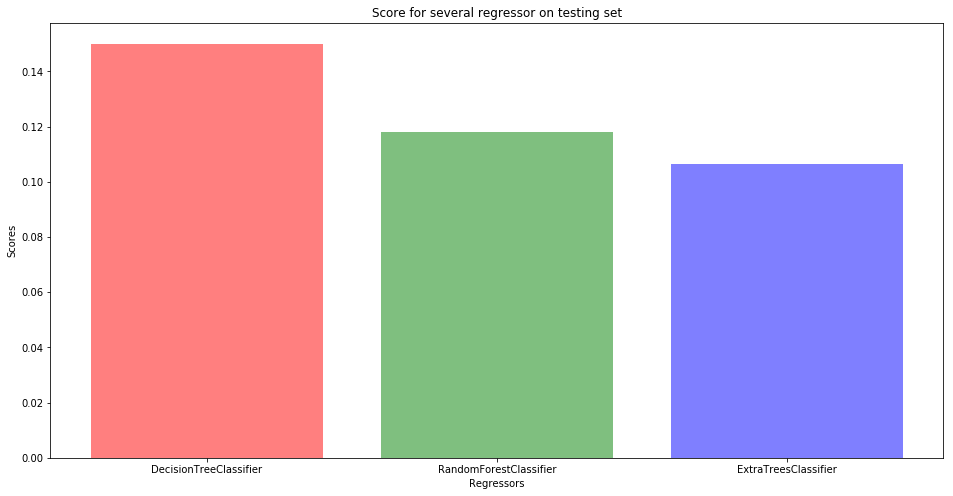

In [73]:
plt.figure(figsize=(16, 8))
x = np.arange(len(scores))
plt.bar(x, scores, alpha=0.5, color=["red", "green", "blue", "purple"])
plt.xticks(x, names_regressors)
plt.xlabel("Regressors")
plt.ylabel("Scores")
plt.title("Score for several regressor on testing set")
plt.show()

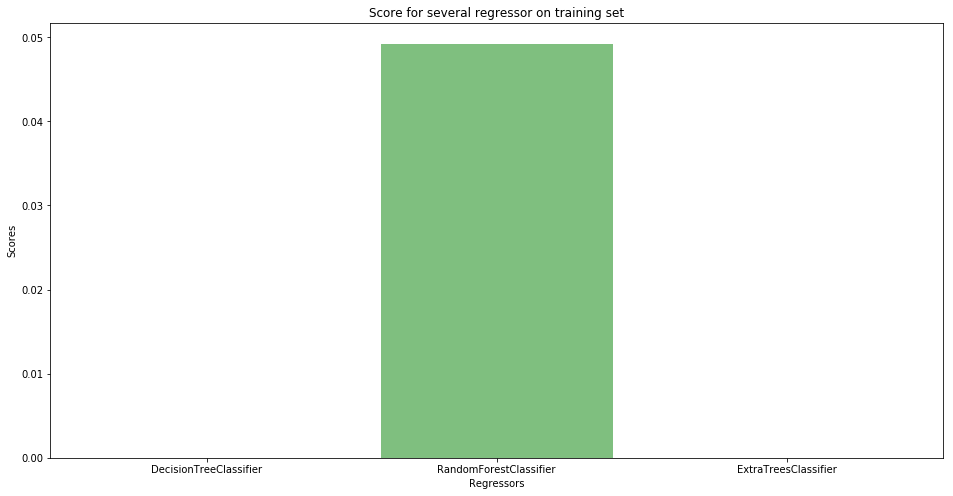

In [74]:
plt.figure(figsize=(16, 8))
x = np.arange(len(scores))
plt.bar(x, scores_train, alpha=0.5, color=["red", "green", "blue", "purple"])
plt.xticks(x, names_regressors)
plt.xlabel("Regressors")
plt.ylabel("Scores")
plt.title("Score for several regressor on training set")
plt.show()

# Training with GridSearch Strategy

##### Definition of the algorithm and theirs parameters for the grid search

In [75]:
names_regressors = ['RandomForestRegressor']
names_regressors_tunedParams = [
    ["RandomForestRegressor", RandomForestRegressor(), {"max_depth": [3, 5], "bootstrap": [True, False]}]
]

##### Training of the different algoritms

In [76]:
scores_regressors_cv = []
for name, regressor, tunedParam in names_regressors_tunedParams:
    clf = GridSearchCV(regressor, tunedParam)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    score = rmspe(y_pred, y_validation.values)

    print("\t Score:", score, "\n")
    
    print(name, "Best parameters :", clf.best_params_, "Accuracy:", score)
    scores_regressors_cv.append(score)

	 Score: 0.24778670844126247 

RandomForestRegressor Best parameters : {'bootstrap': True, 'max_depth': 5} Accuracy: 0.24778670844126247


##### Plot the different scores

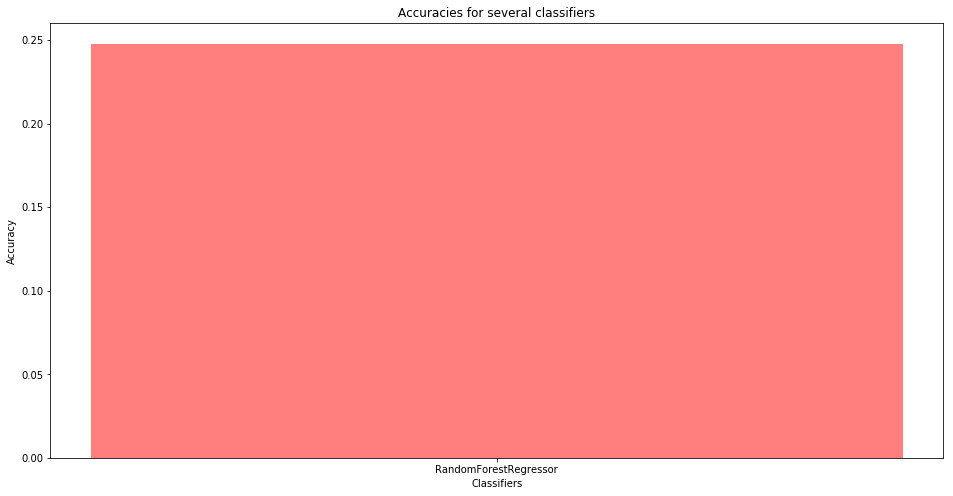

In [77]:
plt.figure(figsize=(16, 8))
x = np.arange(len(scores_regressors_cv))
plt.bar(x, scores_regressors_cv, alpha=0.5, color=["red", "green", "blue", "purple"])
plt.xticks(x, names_regressors)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracies for several classifiers")
plt.show()

# Naive Approach

In [78]:
class Naive:
    
    def same_day(self,day1,day2):
        """Return true if day1 and day 2 are the same day juste different year"""
        return (day1.day == day2.day) and (day1.month ==day2.month)
    
    def train(self,data,target):
        #Compute the mean aggregate by Days
        X = pd.concat([data['Date'].copy() , target.copy()],axis=1)
        X['Date'] = X['Date'].apply(lambda x : (x.day,x.month))
        self.aggregate = X.groupby(['Date']).mean().reset_index()

    def predict(self,X): 
        X = X.copy()
        X['Date'] = X['Date'].apply(lambda x : (x.day,x.month))
        # Merge with the aggregate
        pred = pd.merge(pd.DataFrame(X['Date']), self.aggregate, left_on='Date', right_on='Date')
        return np.array(pred['Sales'])

In [79]:
naive_model = Naive()
naive_model.train(Train,Train['Sales'])

y_train_pred = naive_model.predict(Train)
y_valid_pred = naive_model.predict(Validation)

print('Error on training set ', rmspe(y_train_pred, y_train.values))
print('Error on testing set ', rmspe(y_valid_pred, y_validation.values))

AttributeError: 'int' object has no attribute 'day'

In [ ]:
#Evalueate it on the kaggle dataset
naive_model = Naive()
naive_model.train(train,train['Sales'])
prediction = naive_model.predict(test)
indic = test['Id']
res = pd.DataFrame(indic)
res['Sales'] = prediction
res.to_csv('data/submission_naive.csv', index = False)

L'approche naive fait 0.54591 sur Kaggle 

# Evaluation